# Practice  - Reddit API

Build your parameter Grid

In [1]:
import requests
import pandas as pd
import time

In [2]:
# pushshift params
params = {
    "subreddit" : 'dataisbeautiful',
    "size" : 25,
}

In [3]:
post_url = 'https://api.pushshift.io/reddit/submission/search'

In [4]:
# Usual requests.get method
res = requests.get(post_url, params)

In [5]:
# Look at JSON

In [6]:
res.json().keys()

dict_keys(['data'])

In [7]:
pd.DataFrame(res.json()['data']).head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,...,whitelist_status,wls,gallery_data,is_gallery,media_metadata,removed_by_category,media,media_embed,secure_media,secure_media_embed
0,[],False,MahdiGhajary,ocmaker,[],1c7d62a6-099d-11e7-9b3c-0ee50bfd7a4c,OC: 1,dark,text,t2_87qt1s5t,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,fortune_auto,ocmaker,[],1c7d62a6-099d-11e7-9b3c-0ee50bfd7a4c,OC: 4,dark,text,t2_an0o6,...,all_ads,6,"{'items': [{'id': 19796021, 'media_id': '4tepm...",True,"{'4tepmvm8ue861': {'e': 'Image', 'id': '4tepmv...",NaN,NaN,NaN,NaN,NaN
2,[],False,_chrismp,ocmaker,[],1c7d62a6-099d-11e7-9b3c-0ee50bfd7a4c,OC: 7,dark,text,t2_22yrfc9u,...,all_ads,6,"{'items': [{'id': 19793418, 'media_id': 'uppj4...",True,"{'safamsroqe861': {'e': 'Image', 'id': 'safams...",NaN,NaN,NaN,NaN,NaN
3,[],False,arratonao,None,[],NaN,None,NaN,text,t2_zn05b,...,all_ads,6,NaN,NaN,NaN,moderator,NaN,NaN,NaN,NaN
4,[],False,barnoygil,None,[],NaN,None,NaN,text,t2_47g1n9l2,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Build an if/else control flow 

In [9]:
# Control flow for the above
res = requests.get(post_url, params)
if res.status_code == 200:
    posts_df = pd.DataFrame(res.json()['data'])
else:
    print(res.status_code)

In [10]:
posts_df[['title', 'selftext', 'score', 'created_utc']]

,title,selftext,score,created_utc
0,[OC] Risk of having at least one COVID-19 posi...,,1,1609371680
1,[OC] The personal data gold rush from the Inte...,,1,1609371527
2,[OC] The Last of us Part II is by far the most...,,1,1609370425
3,20 years of Nintendo sales,,1,1609369773
4,[OC] COVID-19 vaccination per 100 people,,1,1609367799
5,COVID-19 vaccination per 100 people,,1,1609367551
6,"Watch ""How Weird Is My Audience? I Polled 15,4...",,1,1609367385
7,[OC] Check out this Sankey Diagram I created: ...,,1,1609366913
8,https://infographics.economist.com/2020/job-da...,,1,1609365296
9,The Economist is hiring full-time and trainee ...,,1,1609365216


In [11]:
# the 4 columns that most folks will likely be interested in
posts_df = posts_df[['title', 'selftext', 'score', 'created_utc']]

In [12]:
# same as above, but for comments
comment_url = 'https://api.pushshift.io/reddit/comment/search'
res = requests.get(comment_url, params)
if res.status_code == 200:
    comments_df = pd.DataFrame(res.json()['data'])
else:
    print(res.status_code)

In [13]:
comments_df = [['body', 'created_utc']]

In [14]:
# comments_df.head()

In [15]:
posts_df['created_utc'].max()

1609371680

In [16]:
posts_df['created_utc'].min()

1609353819

In [17]:
# just one example of a loop for pulling in subreddits
url = 'https://api.pushshift.io/reddit/submission/search'
dfs = []
loops = 10
subreddit = 'datasets'
params = {
    'subreddit': subreddit,
    'size': 100,
}
start_time = time.time()
for i in range(loops):
    current_time = time.time()
    #requesting data
    try:
        res = requests.get(url, params)
        print(f'res {i+1} code: ', res.status_code)
        data = res.json()
        posts = data['data']
        dfs.append(pd.DataFrame(posts))
        #get oldest post time and use as before parameter in next request
        oldest = posts['created_utc'].min()
        params['before'] = oldest
        #sleep for 1 second
        time.sleep(1)
    except:
        pass
reddit_posts = pd.concat(dfs)
#filename = subreddit + '.csv'
#reddit_posts.to_csv('./datasets/' + filename, index=False)


res 1 code:  200
res 2 code:  200
res 3 code:  200
res 4 code:  200
res 5 code:  200
res 6 code:  200
res 7 code:  200
res 8 code:  200
res 9 code:  200
res 10 code:  200
res 11 code:  200
res 12 code:  200
res 13 code:  200
res 14 code:  200
res 15 code:  200
res 16 code:  200
res 17 code:  200
res 18 code:  200
res 19 code:  200
res 20 code:  200


In [18]:
base_url = 'https://api.pushshift.io/reddit/submission/search'

# pushshift params
params = {
    "subreddit" : 'dataisbeautiful',
    "size" : 25,
    "before": "2020-03-14"
}

In [19]:
res2 = requests.get(base_url, params)

In [21]:
datasets_df = pd.DataFrame(res2.json()['data'])

In [22]:
# converting UTC to datetime
pd.to_datetime(datasets_df['created_utc'], unit='s')

0    2020-03-13 23:58:00
1    2020-03-13 23:57:53
2    2020-03-13 22:49:35
3    2020-03-13 22:48:20
4    2020-03-13 22:46:03
5    2020-03-13 22:44:46
6    2020-03-13 22:26:39
7    2020-03-13 22:18:08
8    2020-03-13 22:15:21
9    2020-03-13 21:56:27
10   2020-03-13 21:56:15
11   2020-03-13 21:55:05
12   2020-03-13 21:43:58
13   2020-03-13 21:40:03
14   2020-03-13 21:34:59
15   2020-03-13 21:30:08
16   2020-03-13 21:10:19
17   2020-03-13 20:54:49
18   2020-03-13 20:49:14
19   2020-03-13 20:47:39
20   2020-03-13 20:34:19
21   2020-03-13 20:33:22
22   2020-03-13 20:25:38
23   2020-03-13 20:11:44
24   2020-03-13 19:54:39
Name: created_utc, dtype: datetime64[ns]

In [23]:
# saving datetime as a new column
datasets_df['datetime'] = pd.to_datetime(datasets_df['created_utc'], unit='s')

In [24]:
datasets_df[['title', 'selftext', 'datetime']].head()

,title,selftext,datetime
0,So pretty!,,2020-03-13 23:58:00
1,"White Minorization within 10-20 years, visuali...",,2020-03-13 23:57:53
2,Geaux Tigers,,2020-03-13 22:49:35
3,"When speaking about Data Visualization, what d...",,2020-03-13 22:48:20
4,[OC]Interesting visualisation about the spread...,,2020-03-13 22:46:03


In [25]:
# some students end up just combining their title/selftext columns
datasets_df['merged'] = datasets_df['title'] + " " + datasets_df['selftext']

In [26]:
datasets_df['merged'][0]

'So pretty! '

In [27]:
# 5 longest posts
datasets_df['selftext'].map(lambda x: len(x)).nlargest()

0    0
1    0
2    0
3    0
4    0
Name: selftext, dtype: int64

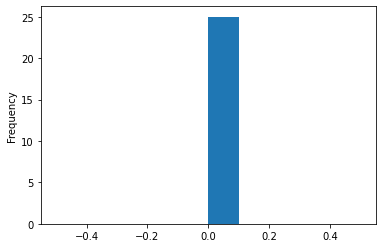

In [28]:
# distribution of post length
datasets_df['selftext'].map(lambda x: len(x)).plot(kind='hist');